In [1]:
import pandas as pd
import numpy as np

In [2]:
Train = pd.read_csv('public_data/train.csv')
Train.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [3]:
def Make_TimeSeries_dataset(data,step):
    
    data = np.array(data)
    T_data = []
    for i in range(len(data)):
        if len(data[i:i+step]) == step:
            T_data.append(data[i:i+step])
        else :
            break

    T_data = pd.DataFrame(T_data)
    return T_data

In [4]:
algi = '배추_가격(원/kg)'
Train = Train[Train[algi] !=0.0]
Train.reset_index(drop=True,inplace=True)
data = Train[algi]

### train, valid, test 분리

In [5]:
pre_train = data[:len(data)//10*7]
train = pre_train[:len(pre_train)//10*7]
valid = pre_train[len(pre_train)//10*7:]
test = data[len(data)//10*7:]
print(train.shape, valid.shape,test.shape)

train_data = Make_TimeSeries_dataset(train,31).values
valid_data = Make_TimeSeries_dataset(valid,31).values
test_data = Make_TimeSeries_dataset(test,31).values
print(train_data.shape, valid_data.shape,test_data.shape)

(721,) (315,) (444,)
(691, 31) (285, 31) (414, 31)


### Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()

In [7]:
train_s = Scaler.fit_transform(train_data)
valid_s = Scaler.transform(valid_data)
test_s = Scaler.transform(test_data)

In [8]:
X_train = train_s[:,:-1]
y_train = train_s[:,-1]
X_valid = valid_s[:,:-1]
y_valid = valid_s[:,-1]

### reshape

In [9]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_valid= X_valid.reshape(X_valid.shape[0],X_valid.shape[1],1)
X_test = test_s.reshape(test_s.shape[0],test_s.shape[1],1)
print(X_train.shape, X_valid.shape,X_test.shape)

(691, 30, 1) (285, 30, 1) (414, 31, 1)


### 모델링

In [10]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.LSTM(30,return_sequences=True,input_shape=(X_train.shape[0],X_train.shape[2])),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30,return_sequences=True),
    keras.layers.LSTM(30),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
print(model.evaluate(X_valid, y_valid))

Epoch 1/20
22/22 [==============================] - 18s 231ms/step - loss: 0.7730 - val_loss: 0.2704
Epoch 2/20
22/22 [==============================] - 2s 84ms/step - loss: 0.5556 - val_loss: 0.1938
Epoch 3/20
22/22 [==============================] - 2s 91ms/step - loss: 0.4808 - val_loss: 0.1810
Epoch 4/20
22/22 [==============================] - 2s 88ms/step - loss: 0.4559 - val_loss: 0.1874
Epoch 5/20
22/22 [==============================] - 2s 89ms/step - loss: 0.4342 - val_loss: 0.1735
Epoch 6/20
22/22 [==============================] - 2s 88ms/step - loss: 0.4216 - val_loss: 0.1675
Epoch 7/20
22/22 [==============================] - 2s 88ms/step - loss: 0.4197 - val_loss: 0.1683
Epoch 8/20
22/22 [==============================] - 2s 86ms/step - loss: 0.4047 - val_loss: 0.1563
Epoch 9/20
22/22 [==============================] - 2s 91ms/step - loss: 0.4054 - val_loss: 0.1611
Epoch 10/20
22/22 [==============================] - 2s 92ms/step - loss: 0.3966 - val_loss: 0.1328
Epoch 1

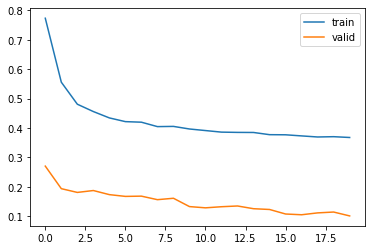

In [11]:
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

### 적용?

In [12]:
y_pred = model.predict(X_test)
predict_y = y_pred*np.std(train)+np.mean(train)
origin_y = Make_TimeSeries_dataset(test,32).values[:,-1]

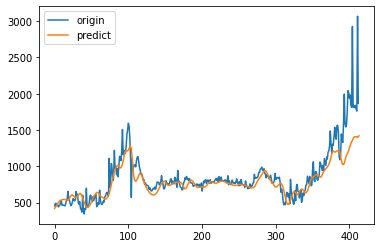

In [13]:
plt.plot(origin_y, label='origin')
plt.plot(predict_y, label='predict')
plt.legend()
plt.show()